Line 1: Import python package Pandas (a Python package for working with data), seaborn (a Python graphing library) and Python matplotlib (a Python plotting library), datetime (used to format dates).  The Seaborn package generates warnings that we don't want to see, so there is a "warning" code to suppress them.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import datetime as dt

Line 2: Imports the excel data as a csv file.  It is saved into the variable ‘data.’ For working on my computer, the code is:
data = pd.read_csv('Datamart-Export_DY_WK100-500 Pound Barrel Cheddar Cheese Prices, Sales, and Moisture Content_20170829_122601.csv').  
But once uploaded to Kaggle it needs to be:
data = pd.read_csv('../input/Datamart-Export_DY_WK100-500 Pound Barrel Cheddar Cheese Prices, Sales, and Moisture Content_20170829_122601.csv')

In [2]:
data = pd.read_csv('Datamart-Export_DY_WK100-500 Pound Barrel Cheddar Cheese Prices, Sales, and Moisture Content_20170829_122601.csv')

Line 3: The next few line are ‘standard’ ways to heck the data & take a quick look at it.   First the ‘shape’; the number of rows & columns. 

In [3]:
data.shape

(1410, 7)

Line 4: ".head" command shows the first few rows of the data.   The 10 specifies the number of rows.  If the () is blank, the default is 5 rows.

In [4]:
data.head(10)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content
0,8/19/2017,8/23/2017,22-Jul,1.5238,1.4489,"9,233,624",34.79
1,8/19/2017,8/23/2017,29-Jul,1.5636,1.4863,"10,948,266",34.77
2,8/19/2017,8/23/2017,5-Aug,1.5891,1.5113,"11,520,370",34.81
3,8/19/2017,8/23/2017,12-Aug,1.6360,1.5526,"10,741,788",34.67
4,8/19/2017,8/23/2017,19-Aug,1.6543,1.5738,"11,131,479",34.83
5,8/12/2017,8/16/2017,12-Aug,1.6360,1.5526,"10,752,293",34.67
6,8/12/2017,8/16/2017,5-Aug,1.5891,1.5113,"11,520,371",34.81
7,8/12/2017,8/16/2017,29-Jul,1.5636,1.4863,"10,948,267",34.77
8,8/12/2017,8/16/2017,22-Jul,1.5238,1.4489,"9,233,624",34.80
9,8/12/2017,8/16/2017,15-Jul,1.4880,1.4164,"13,441,457",34.87


line 5 Verify that we are working with a data frame. We ‘know’ we have a data frame, type(data) verifies that the data was read in as a data frame .

In [5]:
type(data)

pandas.core.frame.DataFrame

line 6: this is a new code I found ‘.dtypes.’ Returns the type of each data type in the dataframe.  This tells me the 3 ‘date” fields aren’t dates & that the sales field in not an integer (or float).   

In [6]:
data.dtypes

Week Ending Date                            object
Report Date                                 object
Date                                        object
Weighted Price                             float64
Weighted Price adjusted to 38% moisture    float64
Sales                                       object
Moisture Content                           float64
dtype: object

Line 7: See if we have any missing data. We don’t have any missing data. We are asking if there are any null values. If we had any null values we would get ‘True” but since everything is ‘False’ we don’t have any null values.  However, we do know there are a handful of zero data (which are probably null data).

In [7]:
data.isnull().any()

Week Ending Date                           False
Report Date                                False
Date                                       False
Weighted Price                             False
Weighted Price adjusted to 38% moisture    False
Sales                                      False
Moisture Content                           False
dtype: bool

Line 8: Use data.describe to see an overview of the data means, median, max, min, etc for each column. This gives us information on the columns with data, but the columns with word descriptors (the 3 date columns & the sales column) are not included. This is an interesting feature that gives us some statistical information about our data.  We see the that there is zero listed as a minimum (from the zeros in out data). 

In [8]:
data.describe()

,Weighted Price,Weighted Price adjusted to 38% moisture,Moisture Content
count,1410.000000,1410.000000,1410.000000
mean,1.807688,1.742051,34.576922
std,0.314208,0.241344,3.590251
min,0.000000,1.354400,0.000000
25%,1.621600,1.554700,34.840000
50%,1.767600,1.687650,34.945000
75%,1.919800,1.831800,35.040000
max,2.598400,2.476400,35.350000


Line 9:  Here is where I begin working to get useable dates.  (Again the ‘ugly’ files show many of the attempts I made that didn’t work).  First I took the ‘Date’ column & saved as a new ‘mo_day’ column and added 1999 to the end (for a full date format).  Data head then shows us the data.

In [9]:
data['mo_day']=data['Date'].astype(str)+'-1999'
data.head()

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day
0,8/19/2017,8/23/2017,22-Jul,1.5238,1.4489,"9,233,624",34.79,22-Jul-1999
1,8/19/2017,8/23/2017,29-Jul,1.5636,1.4863,"10,948,266",34.77,29-Jul-1999
2,8/19/2017,8/23/2017,5-Aug,1.5891,1.5113,"11,520,370",34.81,5-Aug-1999
3,8/19/2017,8/23/2017,12-Aug,1.6360,1.5526,"10,741,788",34.67,12-Aug-1999
4,8/19/2017,8/23/2017,19-Aug,1.6543,1.5738,"11,131,479",34.83,19-Aug-1999


Line 10: extracts the year from the Week ending date.

In [10]:
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])

data['year'] = data['Week Ending Date'].dt.year
data.head(5)
data.tail(5)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year
1405,2012-03-31,4/4/2012,31-Mar,1.6727,1.5909,"9,446,921",34.81,31-Mar-1999,2012
1406,2012-03-31,4/4/2012,24-Mar,1.6333,1.5549,"9,924,835",34.87,24-Mar-1999,2012
1407,2012-03-31,4/4/2012,17-Mar,1.5857,1.5056,"11,921,822",34.70,17-Mar-1999,2012
1408,2012-03-31,4/4/2012,10-Mar,1.5865,1.5146,"11,239,556",35.06,10-Mar-1999,2012
1409,2012-03-31,4/4/2012,3-Mar,1.5837,1.5064,"10,751,088",34.82,3-Mar-1999,2012


Line 11: Splits the date into the month and year form the date format we forced into ‘mo_day’.

In [11]:
data['mo_day'] = pd.to_datetime(data['mo_day'])
data['month'],data['day'] = data['mo_day'].dt.month, data['mo_day'].dt.day 
data.head(10)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,month,day
0,2017-08-19,8/23/2017,22-Jul,1.5238,1.4489,"9,233,624",34.79,1999-07-22,2017,7,22
1,2017-08-19,8/23/2017,29-Jul,1.5636,1.4863,"10,948,266",34.77,1999-07-29,2017,7,29
2,2017-08-19,8/23/2017,5-Aug,1.5891,1.5113,"11,520,370",34.81,1999-08-05,2017,8,5
3,2017-08-19,8/23/2017,12-Aug,1.6360,1.5526,"10,741,788",34.67,1999-08-12,2017,8,12
4,2017-08-19,8/23/2017,19-Aug,1.6543,1.5738,"11,131,479",34.83,1999-08-19,2017,8,19
5,2017-08-12,8/16/2017,12-Aug,1.6360,1.5526,"10,752,293",34.67,1999-08-12,2017,8,12
6,2017-08-12,8/16/2017,5-Aug,1.5891,1.5113,"11,520,371",34.81,1999-08-05,2017,8,5
7,2017-08-12,8/16/2017,29-Jul,1.5636,1.4863,"10,948,267",34.77,1999-07-29,2017,7,29
8,2017-08-12,8/16/2017,22-Jul,1.5238,1.4489,"9,233,624",34.80,1999-07-22,2017,7,22
9,2017-08-12,8/16/2017,15-Jul,1.4880,1.4164,"13,441,457",34.87,1999-07-15,2017,7,15


line 12: Look at ‘.dtypes’ again to see what fields we have been able to modify.

In [12]:
data.dtypes

Week Ending Date                           datetime64[ns]
Report Date                                        object
Date                                               object
Weighted Price                                    float64
Weighted Price adjusted to 38% moisture           float64
Sales                                              object
Moisture Content                                  float64
mo_day                                     datetime64[ns]
year                                                int64
month                                               int64
day                                                 int64
dtype: object

Line 13:  put the year, month & day back together again as a new column ‘Date_year.’  Other than changing the ‘type” of data we haven’t changed any of the original data.

In [13]:
data['Date_yr'] = data['year'].map(str)+'-' + data['month'].map(str) +'-'+ data['day'].map(str)     
data.head(5)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,month,day,Date_yr
0,2017-08-19,8/23/2017,22-Jul,1.5238,1.4489,"9,233,624",34.79,1999-07-22,2017,7,22,2017-7-22
1,2017-08-19,8/23/2017,29-Jul,1.5636,1.4863,"10,948,266",34.77,1999-07-29,2017,7,29,2017-7-29
2,2017-08-19,8/23/2017,5-Aug,1.5891,1.5113,"11,520,370",34.81,1999-08-05,2017,8,5,2017-8-5
3,2017-08-19,8/23/2017,12-Aug,1.6360,1.5526,"10,741,788",34.67,1999-08-12,2017,8,12,2017-8-12
4,2017-08-19,8/23/2017,19-Aug,1.6543,1.5738,"11,131,479",34.83,1999-08-19,2017,8,19,2017-8-19


Line 14 converts our new ‘Date_year’ into a date format.

In [14]:

data['Date_yr'] = pd.to_datetime(data['Date_yr'])
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])
data.head(5)


,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,month,day,Date_yr
0,2017-08-19,8/23/2017,22-Jul,1.5238,1.4489,"9,233,624",34.79,1999-07-22,2017,7,22,2017-07-22
1,2017-08-19,8/23/2017,29-Jul,1.5636,1.4863,"10,948,266",34.77,1999-07-29,2017,7,29,2017-07-29
2,2017-08-19,8/23/2017,5-Aug,1.5891,1.5113,"11,520,370",34.81,1999-08-05,2017,8,5,2017-08-05
3,2017-08-19,8/23/2017,12-Aug,1.6360,1.5526,"10,741,788",34.67,1999-08-12,2017,8,12,2017-08-12
4,2017-08-19,8/23/2017,19-Aug,1.6543,1.5738,"11,131,479",34.83,1999-08-19,2017,8,19,2017-08-19


Line 15: Again use  ‘.dtypes’ to check our field types.

In [15]:
data.dtypes

Week Ending Date                           datetime64[ns]
Report Date                                        object
Date                                               object
Weighted Price                                    float64
Weighted Price adjusted to 38% moisture           float64
Sales                                              object
Moisture Content                                  float64
mo_day                                     datetime64[ns]
year                                                int64
month                                               int64
day                                                 int64
Date_yr                                    datetime64[ns]
dtype: object

Line 16: converts sales to an integer, we must remove the commas (,) from the fields.

In [16]:
data['Sales'] = data['Sales'].str.replace(',', '')
data['Sales'] = pd.to_numeric(data['Sales'])          
data.dtypes

Week Ending Date                           datetime64[ns]
Report Date                                        object
Date                                               object
Weighted Price                                    float64
Weighted Price adjusted to 38% moisture           float64
Sales                                               int64
Moisture Content                                  float64
mo_day                                     datetime64[ns]
year                                                int64
month                                               int64
day                                                 int64
Date_yr                                    datetime64[ns]
dtype: object

Line 17: Now that we have a date format in week ending and the mo_day column we can get the difference to find the age of the cheese.  This actually took quite a bit of searching for the right code.  Since I was subtracting 2 dates it wanted to make the result a date filed as well (‘0 days’ or ‘7 days’, etc).  But I needed this number to be an integer. 

In [17]:
data['age']=(data['Week Ending Date']-data['Date_yr']).dt.days
data.head(10)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,month,day,Date_yr,age
0,2017-08-19,8/23/2017,22-Jul,1.5238,1.4489,9233624,34.79,1999-07-22,2017,7,22,2017-07-22,28
1,2017-08-19,8/23/2017,29-Jul,1.5636,1.4863,10948266,34.77,1999-07-29,2017,7,29,2017-07-29,21
2,2017-08-19,8/23/2017,5-Aug,1.5891,1.5113,11520370,34.81,1999-08-05,2017,8,5,2017-08-05,14
3,2017-08-19,8/23/2017,12-Aug,1.6360,1.5526,10741788,34.67,1999-08-12,2017,8,12,2017-08-12,7
4,2017-08-19,8/23/2017,19-Aug,1.6543,1.5738,11131479,34.83,1999-08-19,2017,8,19,2017-08-19,0
5,2017-08-12,8/16/2017,12-Aug,1.6360,1.5526,10752293,34.67,1999-08-12,2017,8,12,2017-08-12,0
6,2017-08-12,8/16/2017,5-Aug,1.5891,1.5113,11520371,34.81,1999-08-05,2017,8,5,2017-08-05,7
7,2017-08-12,8/16/2017,29-Jul,1.5636,1.4863,10948267,34.77,1999-07-29,2017,7,29,2017-07-29,14
8,2017-08-12,8/16/2017,22-Jul,1.5238,1.4489,9233624,34.80,1999-07-22,2017,7,22,2017-07-22,21
9,2017-08-12,8/16/2017,15-Jul,1.4880,1.4164,13441457,34.87,1999-07-15,2017,7,15,2017-07-15,28


Line 18 Once again, use ‘.dtypes’ to check our field types.

In [18]:
data.dtypes

Week Ending Date                           datetime64[ns]
Report Date                                        object
Date                                               object
Weighted Price                                    float64
Weighted Price adjusted to 38% moisture           float64
Sales                                               int64
Moisture Content                                  float64
mo_day                                     datetime64[ns]
year                                                int64
month                                               int64
day                                                 int64
Date_yr                                    datetime64[ns]
age                                                 int64
dtype: object

Line 19: We want to look at our data.  (Specifically, January).  Since we had to force a year based on the week ending date into the “prior week(s)’ data for the age, the December dates in January should be for the prior year.  We see where this results in a negative value for the age.

In [19]:
data.iloc[140:170,]

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,month,day,Date_yr,age
140,2017-02-04,2/8/2017,7-Jan,1.7453,1.6589,9571316,34.77,1999-01-07,2017,1,7,2017-01-07,28
141,2017-02-04,2/8/2017,14-Jan,1.7193,1.6393,13702669,34.97,1999-01-14,2017,1,14,2017-01-14,21
142,2017-02-04,2/8/2017,21-Jan,1.7325,1.6524,11723737,34.99,1999-01-21,2017,1,21,2017-01-21,14
143,2017-02-04,2/8/2017,28-Jan,1.7316,1.6502,11741032,34.94,1999-01-28,2017,1,28,2017-01-28,7
144,2017-02-04,2/8/2017,4-Feb,1.6842,1.6062,12310466,34.99,1999-02-04,2017,2,4,2017-02-04,0
145,2017-01-28,2/1/2017,28-Jan,1.7314,1.6500,11660026,34.94,1999-01-28,2017,1,28,2017-01-28,0
146,2017-01-28,2/1/2017,21-Jan,1.7325,1.6524,11723737,34.99,1999-01-21,2017,1,21,2017-01-21,7
147,2017-01-28,2/1/2017,14-Jan,1.7193,1.6393,13702669,34.97,1999-01-14,2017,1,14,2017-01-14,14
148,2017-01-28,2/1/2017,7-Jan,1.7453,1.6589,9571316,34.77,1999-01-07,2017,1,7,2017-01-07,21
149,2017-01-28,2/1/2017,31-Dec,1.7644,1.6813,9501625,34.94,1999-12-31,2017,12,31,2017-12-31,-337


Line 20:  To correct these we’ll add back in 365.  The code to modify the dates and arrive at the age looks really simple (now), but it took me over 3 hours to just figure out how to get the age.  The lesson: Don’t despair when working with different methods to clean the data.

In [20]:
data['age'][data['age'] < 0] = 365+data['age']
data.iloc[140:170,]
#finally 3 hours!

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,month,day,Date_yr,age
140,2017-02-04,2/8/2017,7-Jan,1.7453,1.6589,9571316,34.77,1999-01-07,2017,1,7,2017-01-07,28
141,2017-02-04,2/8/2017,14-Jan,1.7193,1.6393,13702669,34.97,1999-01-14,2017,1,14,2017-01-14,21
142,2017-02-04,2/8/2017,21-Jan,1.7325,1.6524,11723737,34.99,1999-01-21,2017,1,21,2017-01-21,14
143,2017-02-04,2/8/2017,28-Jan,1.7316,1.6502,11741032,34.94,1999-01-28,2017,1,28,2017-01-28,7
144,2017-02-04,2/8/2017,4-Feb,1.6842,1.6062,12310466,34.99,1999-02-04,2017,2,4,2017-02-04,0
145,2017-01-28,2/1/2017,28-Jan,1.7314,1.6500,11660026,34.94,1999-01-28,2017,1,28,2017-01-28,0
146,2017-01-28,2/1/2017,21-Jan,1.7325,1.6524,11723737,34.99,1999-01-21,2017,1,21,2017-01-21,7
147,2017-01-28,2/1/2017,14-Jan,1.7193,1.6393,13702669,34.97,1999-01-14,2017,1,14,2017-01-14,14
148,2017-01-28,2/1/2017,7-Jan,1.7453,1.6589,9571316,34.77,1999-01-07,2017,1,7,2017-01-07,21
149,2017-01-28,2/1/2017,31-Dec,1.7644,1.6813,9501625,34.94,1999-12-31,2017,12,31,2017-12-31,28


Line 21: We can drop the month and day columns we created; we have the date format we needed.

In [21]:
df1=data
del df1['month']
del df1['day']
df1.head(5)


,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
0,2017-08-19,8/23/2017,22-Jul,1.5238,1.4489,9233624,34.79,1999-07-22,2017,2017-07-22,28
1,2017-08-19,8/23/2017,29-Jul,1.5636,1.4863,10948266,34.77,1999-07-29,2017,2017-07-29,21
2,2017-08-19,8/23/2017,5-Aug,1.5891,1.5113,11520370,34.81,1999-08-05,2017,2017-08-05,14
3,2017-08-19,8/23/2017,12-Aug,1.6360,1.5526,10741788,34.67,1999-08-12,2017,2017-08-12,7
4,2017-08-19,8/23/2017,19-Aug,1.6543,1.5738,11131479,34.83,1999-08-19,2017,2017-08-19,0


Line 22: Index the data by the year.

In [22]:
years = df1.set_index("year")
years.head()
years.tail()

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,Date_yr,age
year,,,,,,,,,,
2012,2012-03-31,4/4/2012,31-Mar,1.6727,1.5909,9446921,34.81,1999-03-31,2012-03-31,0
2012,2012-03-31,4/4/2012,24-Mar,1.6333,1.5549,9924835,34.87,1999-03-24,2012-03-24,7
2012,2012-03-31,4/4/2012,17-Mar,1.5857,1.5056,11921822,34.70,1999-03-17,2012-03-17,14
2012,2012-03-31,4/4/2012,10-Mar,1.5865,1.5146,11239556,35.06,1999-03-10,2012-03-10,21
2012,2012-03-31,4/4/2012,3-Mar,1.5837,1.5064,10751088,34.82,1999-03-03,2012-03-03,28


Line 23: separate the date into smaller year ‘chunks’ so we can take a look at it.

In [23]:
#2017 data
df2017=df1.iloc[0:165,]  #line 165 is 2016 so we need 1 more than line 164 ie 165
#df2017.head()
df2017.tail()

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
160,2017-01-07,1/11/2017,10-Dec,1.8146,1.7338,12170956,35.11,1999-12-10,2017,2017-12-10,28
161,2017-01-07,1/11/2017,17-Dec,1.7761,1.6928,12412307,34.95,1999-12-17,2017,2017-12-17,21
162,2017-01-07,1/11/2017,24-Dec,1.7882,1.7040,10798260,34.94,1999-12-24,2017,2017-12-24,14
163,2017-01-07,1/11/2017,31-Dec,1.7644,1.6813,9501625,34.94,1999-12-31,2017,2017-12-31,7
164,2017-01-07,1/11/2017,7-Jan,1.7446,1.6576,9406780,34.75,1999-01-07,2017,2017-01-07,0


Line 24:  separate the 2016 data, I look at both the head and tail.  If one of the lines is not commented out with a ‘#’ it only shows the last command (head or tail).

In [24]:
df2016=df1.iloc[166:430,]  #line 430 is 2015 so we need 1 more than line 429 ie 430
#df2016.head()
df2016.tail(7)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
423,2016-01-09,1/13/2016,2-Jan,1.5586,1.4857,8839183,34.96,1999-01-02,2016,2016-01-02,7
424,2016-01-09,1/13/2016,9-Jan,1.5873,1.5160,11141233,35.08,1999-01-09,2016,2016-01-09,0
425,2016-01-02,1/6/2016,2-Jan,1.5569,1.4845,8636161,34.97,1999-01-02,2016,2016-01-02,0
426,2016-01-02,1/6/2016,26-Dec,1.5754,1.4981,8669656,34.80,1999-12-26,2016,2016-12-26,6
427,2016-01-02,1/6/2016,19-Dec,1.6124,1.5362,10400022,34.93,1999-12-19,2016,2016-12-19,13
428,2016-01-02,1/6/2016,12-Dec,1.6235,1.5525,10316439,35.16,1999-12-12,2016,2016-12-12,20
429,2016-01-02,1/6/2016,5-Dec,1.6349,1.5585,9709622,34.96,1999-12-05,2016,2016-12-05,27


Line 25:  The 2015 data.

In [25]:
df2015=df1.iloc[430:690,]  #line 690 is 2014 so we need 1 more than line 690 ie 691
#df2015.head()
df2015.tail(7)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
683,2015-01-10,1/14/2015,3-Jan,1.6474,1.5672,9122463,34.83,1999-01-03,2015,2015-01-03,7
684,2015-01-10,1/14/2015,10-Jan,1.6091,1.5322,10718107,34.89,1999-01-10,2015,2015-01-10,0
685,2015-01-03,1/7/2015,3-Jan,1.6474,1.5672,9122463,34.83,1999-01-03,2015,2015-01-03,0
686,2015-01-03,1/7/2015,27-Dec,1.6648,1.5894,8306632,35.06,1999-12-27,2015,2015-12-27,7
687,2015-01-03,1/7/2015,20-Dec,1.6680,1.5900,9999121,34.96,1999-12-20,2015,2015-12-20,14
688,2015-01-03,1/7/2015,13-Dec,1.7866,1.7038,10442002,34.99,1999-12-13,2015,2015-12-13,21
689,2015-01-03,1/7/2015,6-Dec,1.9197,1.8297,9961261,34.95,1999-12-06,2015,2015-12-06,28


Line 26:  The 2014 data

In [26]:
df2014=df1.iloc[690:950,]  #line 950 is 2013
#df2014.head()
df2014.tail(7)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
943,2014-01-11,1/15/2014,4-Jan,2.0602,1.9665,10442145,35.04,1999-01-04,2014,2014-01-04,7
944,2014-01-11,1/15/2014,11-Jan,2.0463,1.9490,10432246,34.91,1999-01-11,2014,2014-01-11,0
945,2014-01-04,1/8/2014,4-Jan,2.0600,1.9666,10364785,35.06,1999-01-04,2014,2014-01-04,0
946,2014-01-04,1/8/2014,28-Dec,1.9897,1.8990,9930157,35.04,1999-12-28,2014,2014-12-28,7
947,2014-01-04,1/8/2014,21-Dec,1.9219,1.8358,10207370,35.09,1999-12-21,2014,2014-12-21,14
948,2014-01-04,1/8/2014,14-Dec,1.9459,1.8521,11302901,34.86,1999-12-14,2014,2014-12-14,21
949,2014-01-04,1/8/2014,7-Dec,1.8959,1.8105,11839380,35.07,1999-12-07,2014,2014-12-07,28


Line 27: We have the data broken into a few smaller chunks so we can take a look at the data.  This first graph shows why we needed to separate out the ‘age.’  The multiple prices tied to the Week Ending Date don’t give us a concise graph.

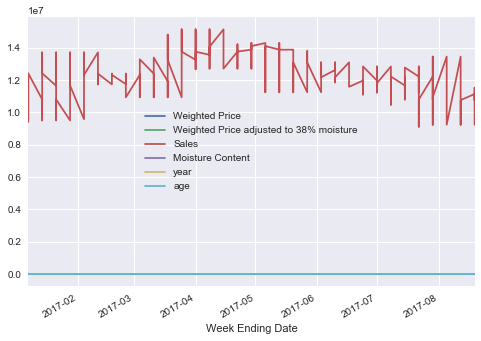

In [27]:
test = df2017
test['Week Ending Date'] = pd.to_datetime(test['Week Ending Date'])
test = test.set_index('Week Ending Date')
title=('sales per week')
ax = test.plot()
plt.show()

Line 28: The 2017 data based on sales; showing all 5 age lines.

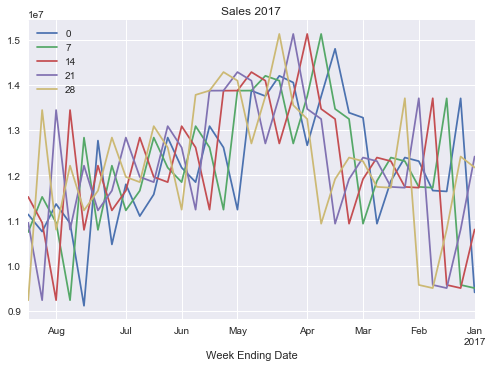

In [28]:
fig, ax = plt.subplots()
for name, group in df2017.groupby('age'):
    group.plot('Week Ending Date', y='Sales', ax=ax, label=name)
    ax.set_title('Sales 2017')
plt.show()

Line 29: The 2017 data based on moisture content; showing all 5 age lines.

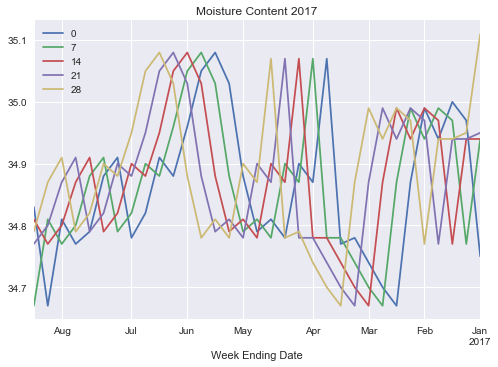

In [29]:
fig, ax = plt.subplots()
for name, group in df2017.groupby('age'):
    group.plot('Week Ending Date', y='Moisture Content', ax=ax, label=name)
    ax.set_title('Moisture Content 2017')
plt.show()

Line 30: The 2017 data based on price; showing all 5 age lines.  If we compare these 3 preliminary graphs.  We notice that sales increase when the price is lowest.

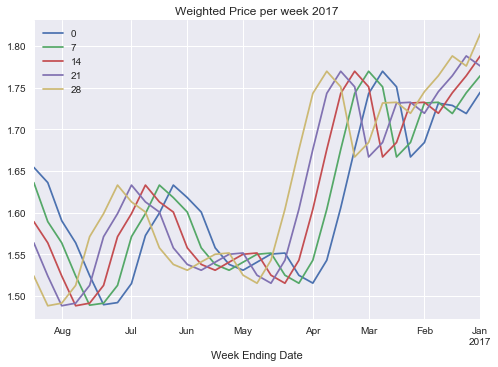

In [30]:
fig, ax = plt.subplots()
for name, group in df2017.groupby('age'):
    group.plot('Week Ending Date', y='Weighted Price', ax=ax, label=name)
    ax.set_title('Weighted Price per week 2017')
plt.show()

Line 31: The 2016 graph shows some problems with the age data.  We’re going to skip over this 2016 data for now.  More data cleaning for another project.

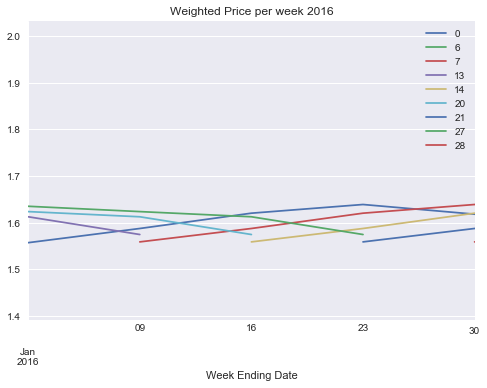

In [31]:
fig, ax = plt.subplots()
for name, group in df2016.groupby('age'):
    group.plot('Week Ending Date', y='Weighted Price', ax=ax, label=name)
    ax.set_title('Weighted Price per week 2016')
plt.show()

Line 32: The 2015 data based on sales; showing all 5 age lines.  This data has quite a few swings, so we’ll increase our figure size to get a better look.

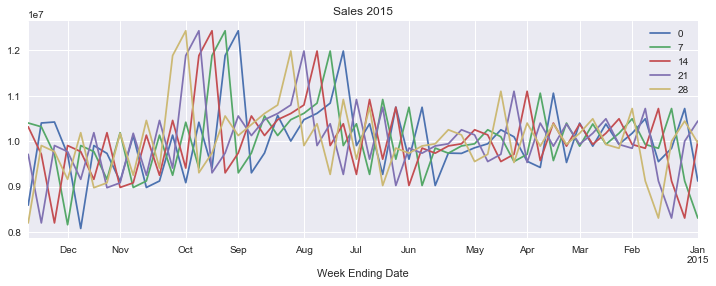

In [32]:
fig, ax = plt.subplots()
for name, group in df2015.groupby('age'):
    group.plot('Week Ending Date', y='Sales', ax=ax, label=name, figsize=(12,4))
    ax.set_title('Sales 2015')
plt.show()

Line 33: The 2015 data based on price; showing all 5 age lines.  Unlike the 2017 data, we don’t see an increase in demand at a lower price.   

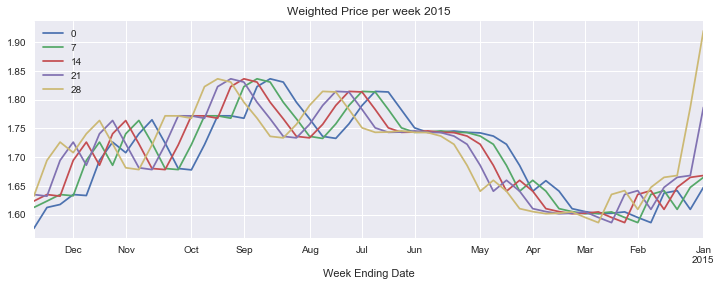

In [33]:
fig, ax = plt.subplots()
for name, group in df2015.groupby('age'):
    group.plot('Week Ending Date', y='Weighted Price', ax=ax, label=name, figsize=(12,4))
    ax.set_title('Weighted Price per week 2015')
plt.show()

Line 34: Let’s take the same look at the 2014 data. The 2014 sales.

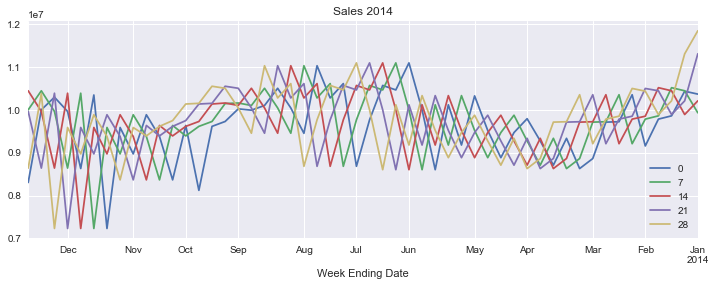

In [34]:
fig, ax = plt.subplots()
for name, group in df2014.groupby('age'):
    group.plot('Week Ending Date', y='Sales', ax=ax, label=name, figsize=(12,4))
    ax.set_title('Sales 2014')
plt.show()

Line 35: The 2014 data based on price; showing all 5 age lines.  Again, we aren’t seeing a correlation between price & sales volume.

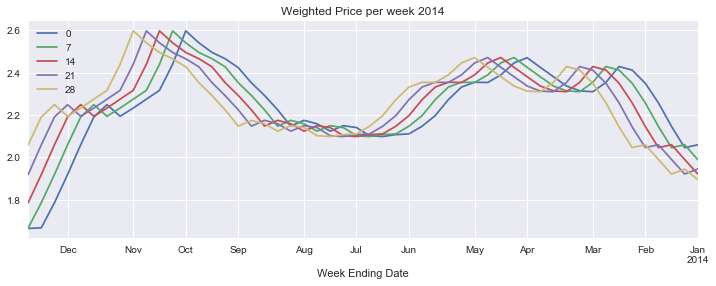

In [35]:
fig, ax = plt.subplots()
for name, group in df2014.groupby('age'):
    group.plot('Week Ending Date', y='Weighted Price', ax=ax, label=name, figsize=(12,4))
    ax.set_title('Weighted Price per week 2014')
plt.show()

the 36: Unlike the 2017 price data, we don’t see an increase in demand at a lower price.  The above graphs also show that the pricing (regardless of the age) follows the same trajectory.   

Line 37: We will take a different direction and look at the data by the age.  We will look at the 14 day old cheese data.  Index by the age and pull out all the 14 age. Again, this code looks pretty simple but it entailed many attempts to figure out how to get this.

In [36]:
df1.set_index(keys=['age'], drop=False,inplace=True)
ages=df1['age'].unique().tolist()
df1_14 = df1.loc[df1.age==14]               
df1_14.head(5)
#df1_14.tail(5)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
age,,,,,,,,,,,
14,2017-08-19,8/23/2017,5-Aug,1.5891,1.5113,11520370,34.81,1999-08-05,2017,2017-08-05,14
14,2017-08-12,8/16/2017,29-Jul,1.5636,1.4863,10948267,34.77,1999-07-29,2017,2017-07-29,14
14,2017-08-05,8/9/2017,22-Jul,1.5238,1.4489,9233624,34.80,1999-07-22,2017,2017-07-22,14
14,2017-07-29,8/2/2017,15-Jul,1.4880,1.4164,13441457,34.87,1999-07-15,2017,2017-07-15,14
14,2017-07-22,7/26/2017,8-Jul,1.4911,1.4204,10789616,34.91,1999-07-08,2017,2017-07-08,14


Line 38: we’ll check the shape of this data. 

In [37]:
df1_14.shape


(280, 11)

    Line 39: This graph compares all the 14 day prices in our data set.  We see how those “zero” prices affect our graph.  

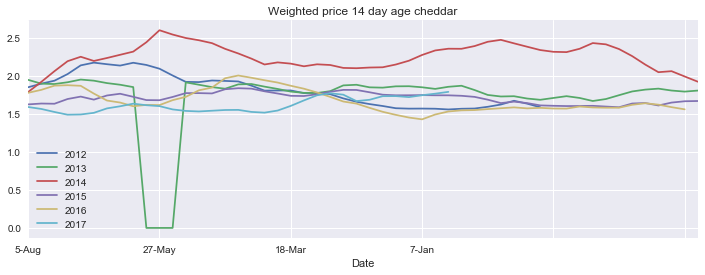

In [38]:
fig, ax = plt.subplots()
for name, group in df1_14.groupby('year'):
    group.plot('Date', y='Weighted Price', ax=ax, label=name,figsize=(12,4))
    ax.set_title('Weighted price 14 day age cheddar')
plt.show()

Line 40: When we compare the sale for the 14 day cheddar we see a relatively steady demand over time.    

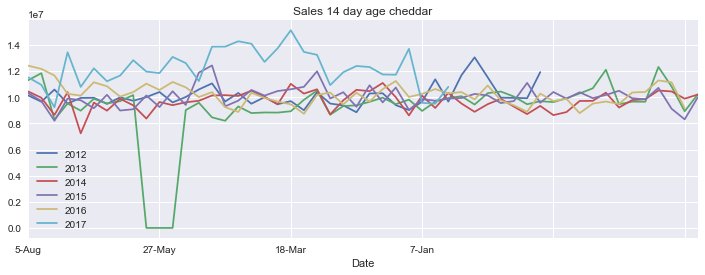

In [39]:
fig, ax = plt.subplots()
for name, group in df1_14.groupby('year'):
    group.plot('Date', y='Sales', ax=ax, label=name,figsize=(12,4))
    ax.set_title('Sales 14 day age cheddar')
plt.show()

Line 41: Lets see if the 28-day cheddar shows us the same information.  We’ll create a 28 day dataset.

In [40]:
df1.set_index(keys=['age'], drop=False,inplace=True)
ages=df1['age'].unique().tolist()
df1_28 = df1.loc[df1.age==28]        
df1_28.head(5)
#df1_28.tail(5)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
age,,,,,,,,,,,
28,2017-08-19,8/23/2017,22-Jul,1.5238,1.4489,9233624,34.79,1999-07-22,2017,2017-07-22,28
28,2017-08-12,8/16/2017,15-Jul,1.4880,1.4164,13441457,34.87,1999-07-15,2017,2017-07-15,28
28,2017-08-05,8/9/2017,8-Jul,1.4911,1.4204,10796511,34.91,1999-07-08,2017,2017-07-08,28
28,2017-07-29,8/2/2017,1-Jul,1.5125,1.4381,12210435,34.79,1999-07-01,2017,2017-07-01,28
28,2017-07-22,7/26/2017,24-Jun,1.5710,1.4943,11220932,34.82,1999-06-24,2017,2017-06-24,28


Line 42: This graph compares all the 28 day prices in our data set.  Agin we see the drop with the “zero” prices.

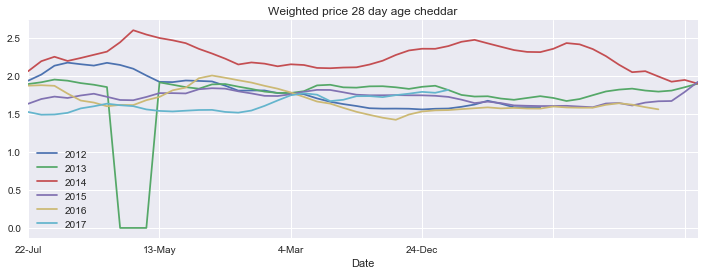

In [41]:
fig, ax = plt.subplots()
for name, group in df1_28.groupby('year'):
    group.plot('Date', y='Weighted Price', ax=ax, label=name,figsize=(12,4))
    ax.set_title('Weighted price 28 day age cheddar')
plt.show()

Line 43: This shows us what we would expect the same relatively steady demand over time for 28 day cheddar.  

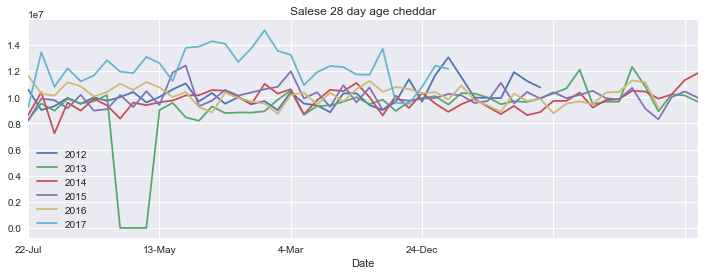

In [42]:
fig, ax = plt.subplots()
for name, group in df1_28.groupby('year'):
    group.plot('Date', y='Sales', ax=ax, label=name,figsize=(12,4))
    ax.set_title('Sales 28 day age cheddar')
plt.show()

Line 44:  We can also compare a limited number of years.  Here is a data set for 14 day cheddar  for 2013 to 2015.

In [43]:
df1_14.set_index(keys=['year'], drop=False,inplace=True)
years_14=df1_14['year'].unique().tolist()
df1_14_2013_2015 = df1_14.loc[(df1_14.year>=2013) & (df1_14.year<=2015)]
df1_14_2013_2015.head(5)
df1_14_2013_2015.tail(5)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
year,,,,,,,,,,,
2013,2013-02-02,2/6/2013,19-Jan,1.8179,1.7274,9655014,34.75,1999-01-19,2013,2013-01-19,14
2013,2013-01-26,1/30/2013,12-Jan,1.8307,1.7385,12318502,34.71,1999-01-12,2013,2013-01-12,14
2013,2013-01-19,1/24/2013,5-Jan,1.8057,1.7130,10823056,34.64,1999-01-05,2013,2013-01-05,14
2013,2013-01-12,1/16/2013,29-Dec,1.7916,1.7043,8925942,34.82,1999-12-29,2013,2013-12-29,14
2013,2013-01-05,1/9/2013,22-Dec,1.8052,1.7146,10220350,34.72,1999-12-22,2013,2013-12-22,14


Line 45:  With fewer data points (only 3 years).  This graph is much less congested and easier to understand.

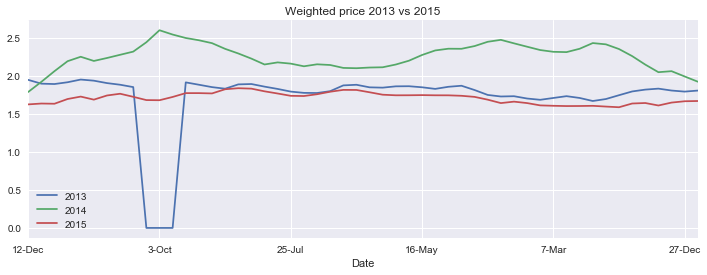

In [44]:
fig, ax = plt.subplots()
for name, group in df1_14_2013_2015.groupby('year'):
    group.plot('Date', y='Weighted Price', ax=ax, label=name,figsize=(12,4))
    ax.set_title('Weighted price 2013 vs 2015')
plt.show()


Line 46:  This data is best viewed as time series (line) graphs.  The Sales data can be plotted as a bar graph.

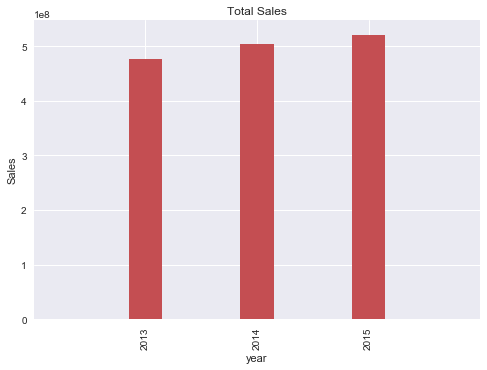

In [45]:
bar = df1_14_2013_2015.groupby("year").sum().plot(kind='bar', width=1.5)
bar_width = 0.4 
bar.set_xlabel("year")
bar.set_ylabel("Sales")
#plt.legend()
#plt.legend.remove()
plt.legend().set_visible(False)
plt.title('Total Sales')
plt.show()